In [86]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [87]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

from matplotlib.ticker import ScalarFormatter

mpl.rc('font', size=20)

In [106]:
def parse_values(x):
    try:
        name = '_'.join(x.split()[0].split('_')[:-1])
        size = int(x.split()[0].split('_')[-1])
        values = list(float(a) for a in x[1+x.find('['): x.find(']')].split())
        return [name, size] + values
    except:
        return None

In [141]:
def hidden_size_picture(file_name, figure_file):
    
    with open(file_name, "r") as f:
        results = f.read()

    results = results.split('\n')
    # results = [re.sub('[\[\]]', '', x) for x in results]
    results = [re.sub('lgbm ', '', x) for x in results]
    results = [re.sub('nn ', '', x) for x in results]

    metric_name = results[8].split()[-1].replace('"','')
    metric_name = {
        'auroc' : 'AUROC',
        'accuracy': 'Accuracy'
    }[metric_name]

    # results = [re.sub('mles_embeddings', 'emb_mles__hidden_size_1000', x) for x in results]

    results = results[[i for i, x in enumerate(results) if 'scores_valid' in x][0]:]

    results = [parse_values(x) for x in results]
    results = results[next(i for i, item in enumerate(results) if item is not None):]
    results = results[:next(i for i, item in enumerate(results) if item is None)]
    results = pd.DataFrame(results, columns = ['model_type', 'hidden_size'] + [f'valid.{i}' for i in range(5)])

    df2 = pd.melt(
        results,
        id_vars=['model_type', 'hidden_size'],
        var_name='fold_n',
        value_vars=[f'valid.{i}' for i in range(5)],
        value_name=metric_name,
    )

    with mpl.rc_context() as rc:
        mpl.rc("figure", figsize=(10,10))
        mpl.rc('font', size=20)

        ax = sns.lineplot(
            x='Embedding size',
            y=metric_name,
            palette='tab10',
            data=df2
            .rename(columns={'hidden_size': 'Embedding size'}),
            ci=95,
        )

        ax.set_xlabel('Embedding size')
        ax.set_xscale('log')

        # ax.set(ylim=(0.74, 0.89))
        ax.set_facecolor('white')

        x_ticks = results.hidden_size.values
        plt.xticks(x_ticks,((str(x) if x not in [2048, 1600] else '') for x in x_ticks))
        #plt.grid(color='white')

        mpl.pyplot.savefig(figure_file, format='pdf', bbox_inches='tight')

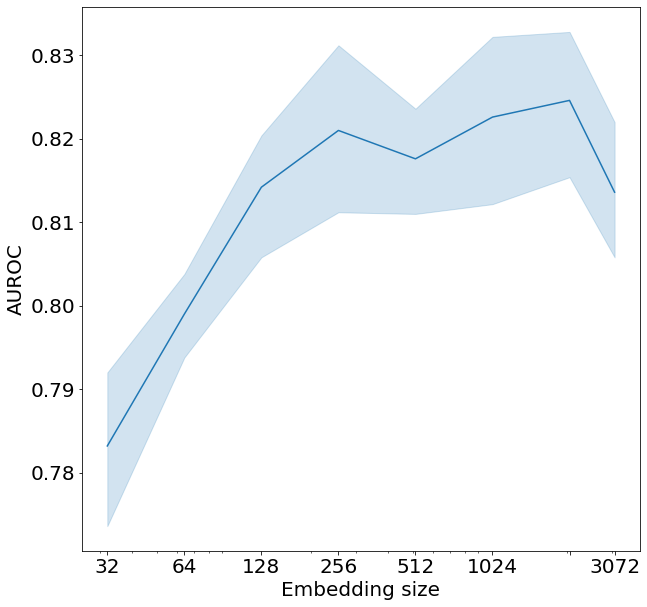

In [137]:
file_name = "../scenario_rosbank/results/scenario_rosbank__hidden_size.txt"
figure_file = 'figures/hidden_size_rosbank.pdf'

hidden_size_picture(file_name, figure_file)

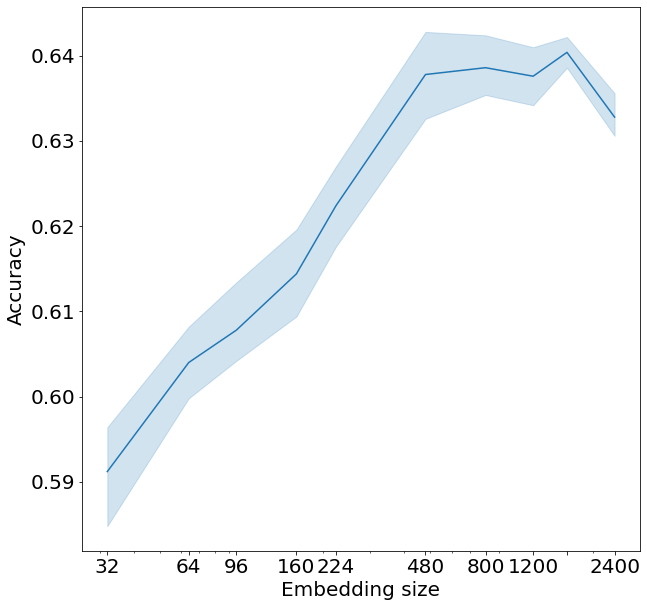

In [142]:
dataset = 'age_pred'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__hidden_size.txt"
figure_file = f'figures/hidden_size_{dataset}.pdf'

hidden_size_picture(file_name, figure_file)

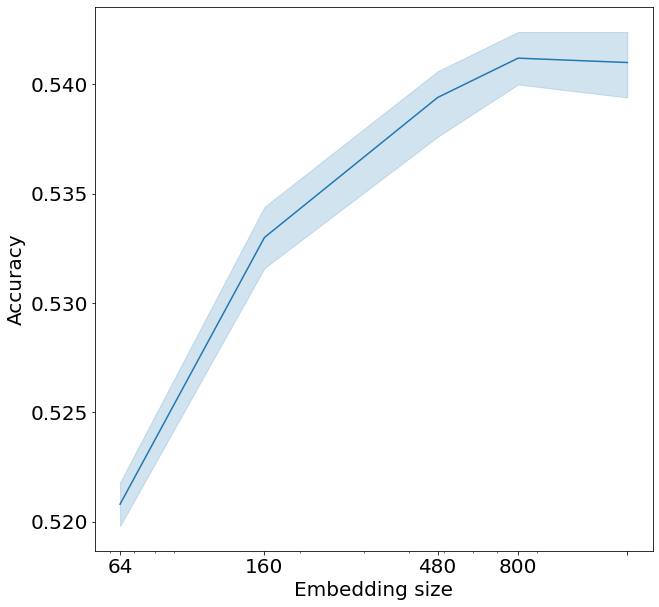

In [143]:
dataset = 'x5'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__hidden_size.txt"
figure_file = f'figures/hidden_size_{dataset}.pdf'

hidden_size_picture(file_name, figure_file)

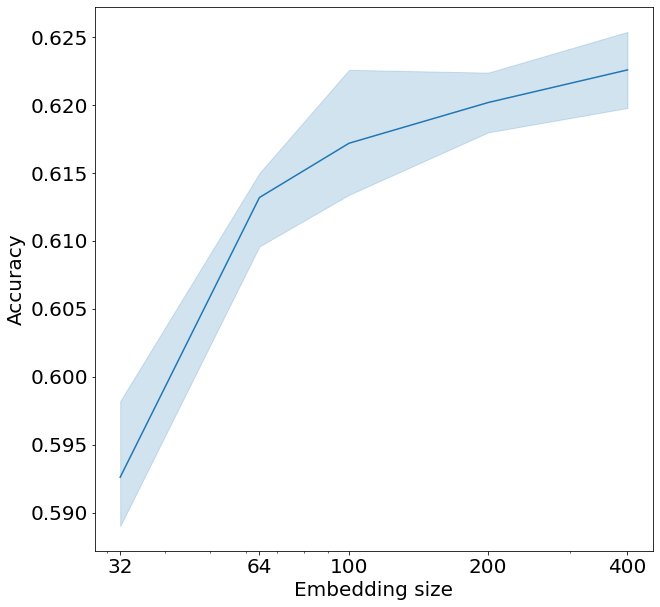

In [145]:
dataset = 'bowl2019'

file_name = f"../scenario_{dataset}/results/scenario_{dataset}__hidden_size.txt"
figure_file = f'figures/hidden_size_{dataset}.pdf'

hidden_size_picture(file_name, figure_file)

In [146]:
file_name

'../scenario_bowl2019/results/scenario_bowl2019__hidden_size.txt'

In [147]:
! cat ../scenario_bowl2019/results/scenario_bowl2019__hidden_size.txt

------------------------------------------------------------------------------------------------------------------------
Vector testing report
Params:
    conf: "conf/embeddings_validation_short_1601589246.hocon"

Collected 30 files with 0 errors

------------------------------------------------------------------------------------------------------------------------
Metric: "accuracy"
                                 scores_valid                                                                                                                                                                                             
                                         mean  t_pm t_int_l t_int_h   std                           values t_f_stat t_f_alpha t_t_stat t_t_alpha t_delta t_delta_pm t_delta_l t_delta_h t_delta_pp t_delta_pm_pp t_delta_l_pp t_delta_h_pp
model_name feature_name                                                                                                                       